# EDA on Titanic Data

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [63]:
df.shape

(891, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Numerical Columns Summaries
- Age
- Fare
- Survived
- Pclass
- SibSp
- Parch

### Age

**Conclusion**
- Age is almost normally distributed.
- Around 20% of the values are missing.
- There are some outliers.
- There is no invalid data.

In [65]:
# Statistical Summary

df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [66]:
# Column Distribution

df['Age'].skew()

np.float64(0.38910778230082704)

In [67]:
# Outlier detection

df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [68]:
# Missing value Percentage

df['Age'].isnull().sum()/len(df['Age']) * 100

np.float64(19.865319865319865)

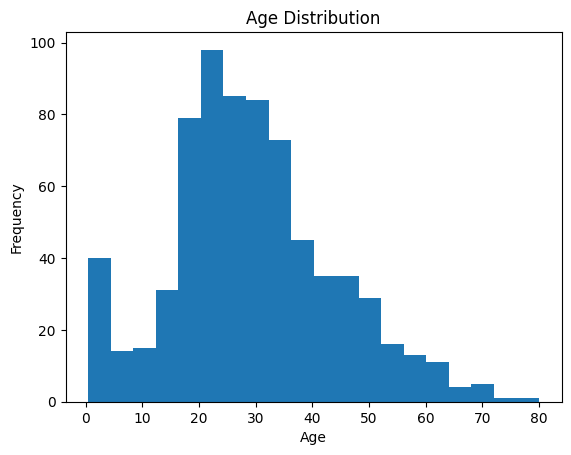

In [69]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


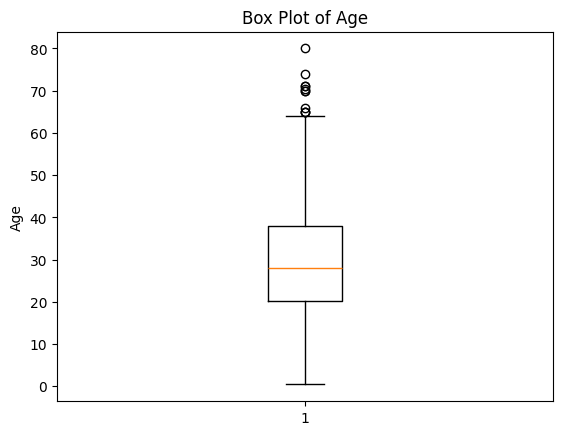

In [70]:
plt.boxplot(df['Age'].dropna())
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()

### Fare

**conclusion**
- The data is highly(positively) skewed.
- Fare column actually contains the group fare not the individual fare

In [71]:
# Statistical Summary

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [72]:
# Column distribution

df['Fare'].skew()

np.float64(4.787316519674893)

In [73]:
# Here we understand that the given fare is in group not individually so we can not say that it is outliers now

df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


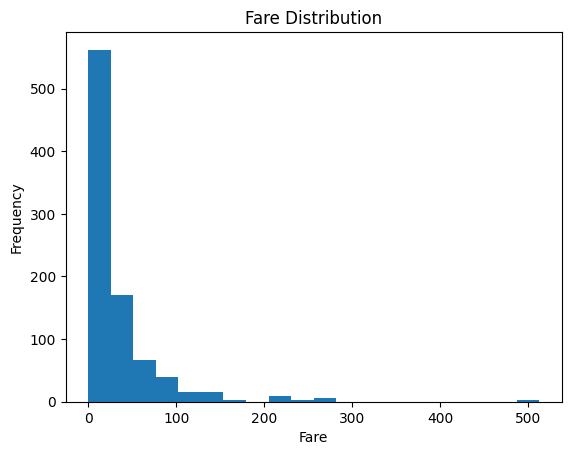

In [74]:
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()

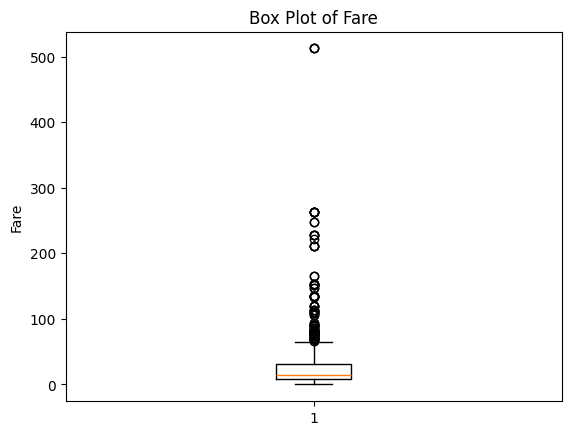

In [75]:
plt.boxplot(df['Fare'].dropna())
plt.ylabel('Fare')
plt.title('Box Plot of Fare')
plt.show()

### Survived

**Conlusion**
- Most of are dead.
- The Accident was crucial so 61.62% are not survived and 38.38% are survived


In [76]:
# Value Counts

df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [77]:
# Checking for Missing Value

df['Survived'].isnull().sum()

np.int64(0)

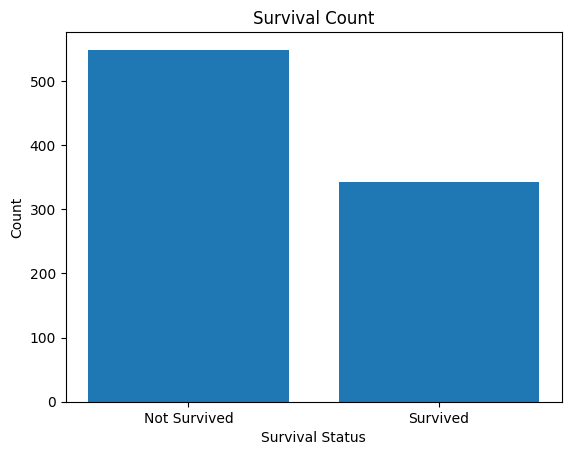

In [78]:
counts = df['Survived'].value_counts().sort_index()

plt.bar(['Not Survived', 'Survived'], counts.values)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

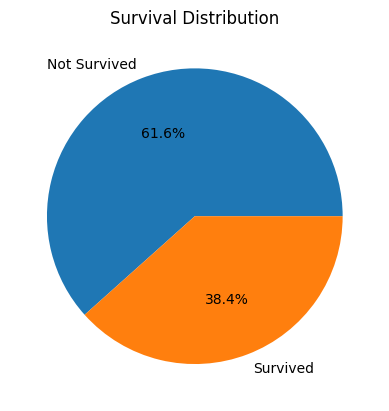

In [79]:
counts = df['Survived'].value_counts().sort_index()

labels = ['Not Survived', 'Survived']

plt.pie(counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.show()

### Pclass
**Conclusion**
- Around 55% of passengers are in class 3
- This Column does not contain any missing values

In [80]:
# count the passenger who had which class at the time of travel 
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [81]:
# Percentage
df['Pclass'].value_counts(normalize=True) * 100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

In [82]:
# Check is there missing value 
df['Pclass'].isnull().sum()

np.int64(0)

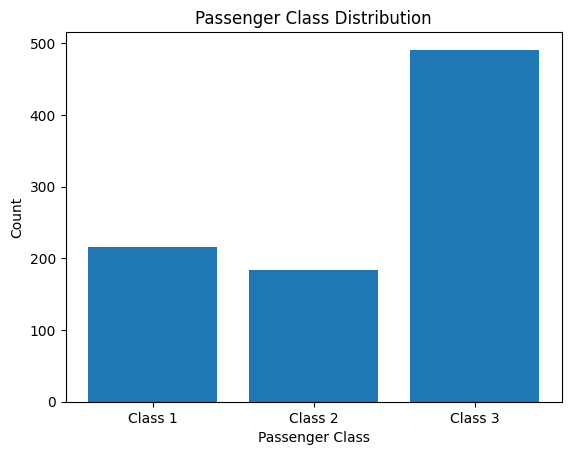

In [83]:
counts = df['Pclass'].value_counts().sort_index()

plt.bar(['Class 1', 'Class 2', 'Class 3'], counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()

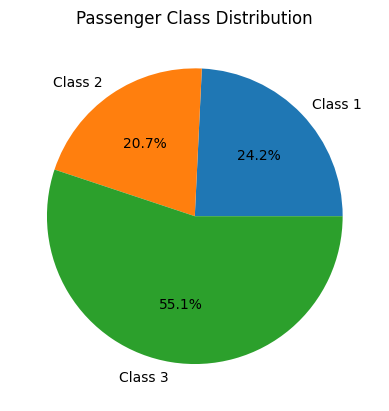

In [84]:
counts = df['Pclass'].value_counts().sort_index()

labels = ['Class 1', 'Class 2', 'Class 3']

plt.pie(counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Passenger Class Distribution')
plt.show()

### SibSp
**Conclusion**
- Around 68% of passengers are traveling without siblings or spouse
- This Column does not contain any missing values

In [85]:
# Value Counts

df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [86]:
# Percentage
df['SibSp'].value_counts(normalize=True) * 100

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: proportion, dtype: float64

In [87]:
# Checking for missing values

df['SibSp'].isnull().sum()

np.int64(0)

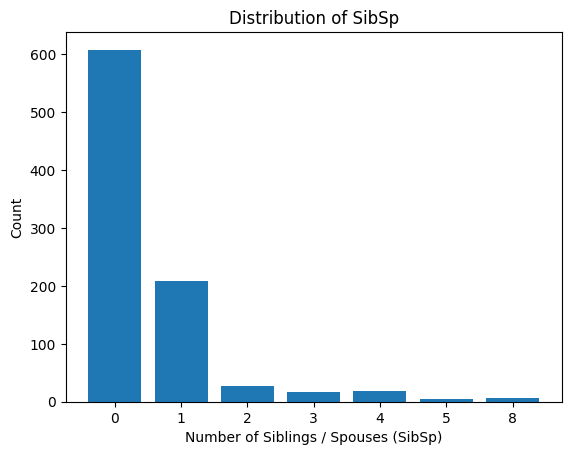

In [88]:
counts = df['SibSp'].value_counts().sort_index()

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Number of Siblings / Spouses (SibSp)')
plt.ylabel('Count')
plt.title('Distribution of SibSp')
plt.show()


### Parch
**Conclusion**
- Around 76% of passengers are traveling without parents of children
- Parch and SibSp columns can be merged to form a new column call family_size


In [89]:
# Value Counts

df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [90]:
# Percentage

df['Parch'].value_counts(normalize=True) * 100

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: proportion, dtype: float64

In [91]:
# Checking for missing values

df['Parch'].isnull().sum()

np.int64(0)

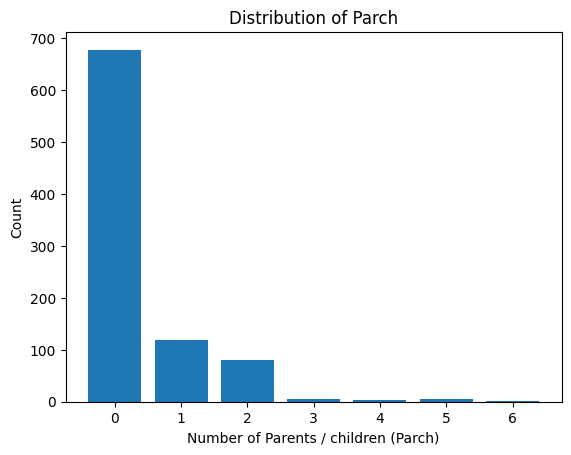

In [92]:
counts = df['Parch'].value_counts().sort_index()

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Number of Parents / children (Parch)')
plt.ylabel('Count')
plt.title('Distribution of Parch')
plt.show()


## Categorical Columns Summaries
- Embarked
- Sex
- Cabin (Cabin Column has around 77% null value in it, so Cabin column is not useful)
- Ticket (Ticket Column is not so important in Analysis)

### Embarked
**Conclusion**
- 72.44% of the passanger boarded from Southampton (S in Embarked)
- only 8.66% of the passanger boarded from (Queenstown) (Q in Embarked)
- only 2 missing values in Embarked column

In [93]:
# Value Counts

df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [94]:
# Percentage

df['Embarked'].value_counts(normalize=True) * 100

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

In [95]:
# Checking for Missing Values

df['Embarked'].isnull().sum()

np.int64(2)

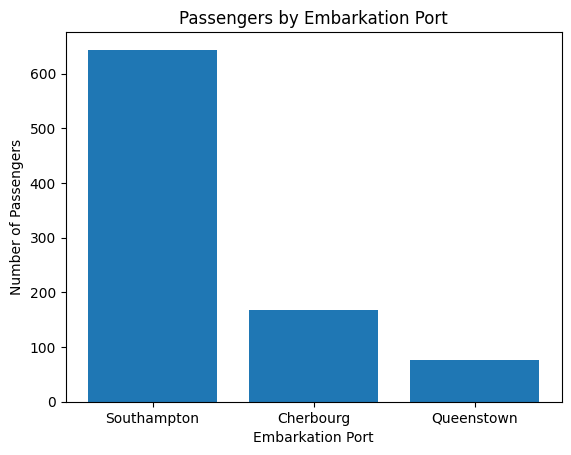

In [96]:
counts = df['Embarked'].value_counts()

labels = ['Southampton', 'Cherbourg', 'Queenstown']

plt.bar(labels, counts.loc[['S', 'C', 'Q']].values)
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.title('Passengers by Embarkation Port')
plt.show()

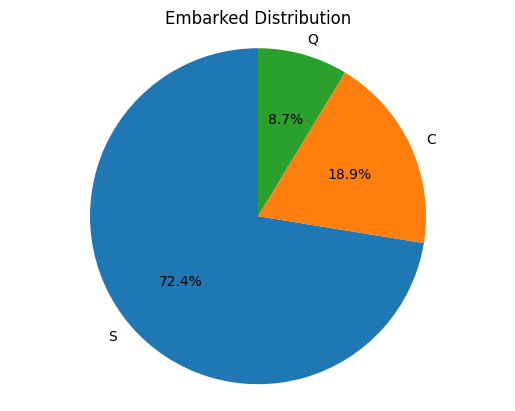

In [97]:
counts = df['Embarked'].value_counts()

plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Embarked Distribution')
plt.axis('equal')
plt.show()

### Sex
**Conclusion**
- Around 65% of passengers are male

In [98]:
# Value Counts

df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [99]:
# Percentage

df['Sex'].value_counts(normalize=True) * 100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [100]:
# Checking for missing values

df['Sex'].isnull().sum()

np.int64(0)

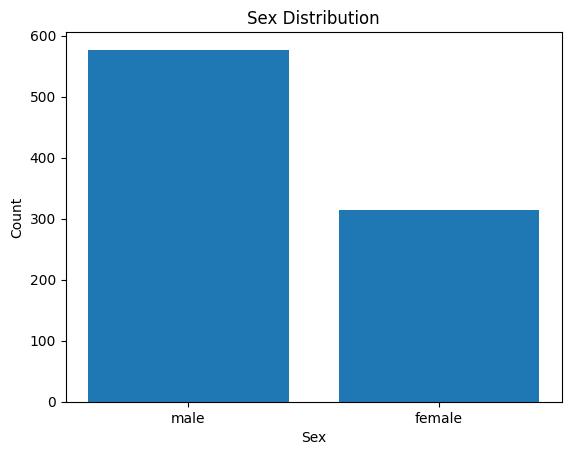

In [101]:
counts = df['Sex'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

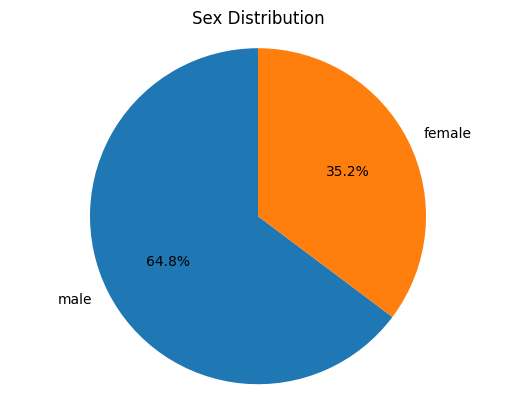

In [102]:
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Sex Distribution')
plt.axis('equal')
plt.show()
